In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
d1=pd.read_csv("/content/drive/MyDrive/PCOS/PCOS_infertility.csv")
d2= pd.read_csv("/content/drive/MyDrive/PCOS/POCS_without_infertility.csv")

In [5]:
d1

,Sl. No,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,0,1.99,1.99,2.07
1,2,0,60.80,1.99,1.53
2,3,1,494.08,494.08,6.63
3,4,0,1.99,1.99,1.22
4,5,0,801.45,801.45,2.26
...,...,...,...,...,...
536,537,0,1.99,1.99,1.7
537,538,0,80.13,1.99,5.6
538,539,0,1.99,1.99,3.7
539,540,0,292.92,1.99,5.2


In [6]:
d2

,Sl. No,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),I beta-HCG(mIU/mL),FSH/LH,TSH (mIU/L),AMH(ng/mL),Weight gain(Y/N),Hair loss(Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Endometrium (mm)
0,1,0,28,19.3,15,78,10.48,2,5,0,1.99,2.16,0.68,2.07,0,0,0,3,3,8.5
1,2,0,36,24.9,15,74,11.70,2,5,1,60.80,6.17,3.16,1.53,0,0,0,3,5,3.7
2,3,1,33,25.3,11,72,11.80,2,5,1,494.08,6.30,2.54,6.63,0,1,0,13,15,10.0
3,4,0,37,29.7,13,72,12.00,2,5,0,1.99,3.42,16.41,1.22,0,0,0,2,2,7.5
4,5,0,25,20.1,11,72,10.00,2,5,1,801.45,4.42,3.57,2.26,0,1,0,3,4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,18.5,17,72,11.00,2,5,0,1.99,5.56,1.11,1.7,0,0,0,1,0,6.7
537,538,0,30,25.3,15,72,10.80,2,5,1,80.13,1.79,2.05,5.6,1,0,0,9,7,8.2
538,539,0,36,23.4,13,74,10.80,2,6,0,1.99,4.30,2.87,3.7,0,0,0,1,0,7.3
539,540,0,27,22.2,15,74,12.00,4,2,0,292.92,1.02,2.50,5.2,0,0,0,7,6,11.5


In [7]:
# Merging the two files as per patient file no.
# The files were sorted into two based on patients with infertility and without infertility

data = pd.merge(d2,d1, on='Sl. No', suffixes={'','_wo'},how='left')

In [8]:
data.columns

Index(['Sl. No', 'PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Pregnant(Y/N)', '  I   beta-HCG(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'Weight gain(Y/N)', 'Hair loss(Y/N)', 'Reg.Exercise(Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)',
       'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo', 'II    beta-HCG(mIU/mL)',
       'AMH(ng/mL)_wo'],
      dtype='object')

In [9]:
#Dropping the repeated features after merging.

data =data.drop([ 'PCOS (Y/N)_wo','  I   beta-HCG(mIU/mL)_wo','AMH(ng/mL)_wo',], axis=1)
#'Unnamed: 41', 'Weight (Kg)' ,'Height(Cm) ' ,

In [10]:
# Changing the title of the properties.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [11]:
data.head()

,Sl. No,Target,Age (yrs),BMI,Blood Group,Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),...,FSH/LH,TSH (mIU/L),AMH(ng/mL),Weight gain(Y/N),Hair loss(Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Endometrium (mm),II beta-HCG(mIU/mL)
0,1,0,28,19.3,15,78,10.48,2,5,0,...,2.16,0.68,2.07,0,0,0,3,3,8.5,1.99
1,2,0,36,24.9,15,74,11.70,2,5,1,...,6.17,3.16,1.53,0,0,0,3,5,3.7,1.99
2,3,1,33,25.3,11,72,11.80,2,5,1,...,6.30,2.54,6.63,0,1,0,13,15,10.0,494.08
3,4,0,37,29.7,13,72,12.00,2,5,0,...,3.42,16.41,1.22,0,0,0,2,2,7.5,1.99
4,5,0,25,20.1,11,72,10.00,2,5,1,...,4.42,3.57,2.26,0,1,0,3,4,7.0,801.45


In [12]:
# Dropping unnecessary features.

data = data.drop(["Sl. No"],axis = 1)

In [13]:
data.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Target                  int64  
 1    Age (yrs)              int64  
 2   BMI                     float64
 3   Blood Group             int64  
 4   Pulse rate(bpm)         int64  
 5   Hb(g/dl)                float64
 6   Cycle(R/I)              int64  
 7   Cycle length(days)      int64  
 8   Pregnant(Y/N)           int64  
 9     I   beta-HCG(mIU/mL)  float64
 10  FSH/LH                  float64
 11  TSH (mIU/L)             float64
 12  AMH(ng/mL)              object 
 13  Weight gain(Y/N)        int64  
 14  Hair loss(Y/N)          int64  
 15  Reg.Exercise(Y/N)       int64  
 16  Follicle No. (L)        int64  
 17  Follicle No. (R)        int64  
 18  Endometrium (mm)        float64
 19  II    beta-HCG(mIU/mL)  float64
dtypes: float64(7), int64(12), object(1)
memory usage: 88.8+ KB


In [14]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [15]:
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: float64

In [16]:
# Dealing with categorical values.
# In this database the type objects are numeric values saved as strings.
# So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')

data['FSH/LH'] = pd.to_numeric(data['FSH/LH'], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [17]:
# Dealing with missing values.
# Filling NA values with the median of that feature.


data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data.dropna(subset=['BMI'], inplace=True)

data.dropna(subset=['FSH/LH'], inplace=True)

#data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

#data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)


In [18]:
# Clearing up the extra space in the column names.

data.columns = [col.strip() for col in data.columns]

In [19]:
data

,Target,Age (yrs),BMI,Blood Group,Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),I beta-HCG(mIU/mL),FSH/LH,TSH (mIU/L),AMH(ng/mL),Weight gain(Y/N),Hair loss(Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Endometrium (mm),II beta-HCG(mIU/mL)
0,0,28,19.3,15,78,10.48,2,5,0,1.99,2.16,0.68,2.07,0,0,0,3,3,8.5,1.99
1,0,36,24.9,15,74,11.70,2,5,1,60.80,6.17,3.16,1.53,0,0,0,3,5,3.7,1.99
2,1,33,25.3,11,72,11.80,2,5,1,494.08,6.30,2.54,6.63,0,1,0,13,15,10.0,494.08
3,0,37,29.7,13,72,12.00,2,5,0,1.99,3.42,16.41,1.22,0,0,0,2,2,7.5,1.99
4,0,25,20.1,11,72,10.00,2,5,1,801.45,4.42,3.57,2.26,0,1,0,3,4,7.0,801.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,18.5,17,72,11.00,2,5,0,1.99,5.56,1.11,1.70,0,0,0,1,0,6.7,1.99
537,0,30,25.3,15,72,10.80,2,5,1,80.13,1.79,2.05,5.60,1,0,0,9,7,8.2,1.99
538,0,36,23.4,13,74,10.80,2,6,0,1.99,4.30,2.87,3.70,0,0,0,1,0,7.3,1.99
539,0,27,22.2,15,74,12.00,4,2,0,292.92,1.02,2.50,5.20,0,0,0,7,6,11.5,1.99


In [20]:
#Assiging the features (X)and target(y).

X= data.drop("Target",axis = 1)
y=data["Target"]

In [21]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [22]:
#model = XGBRFClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
print("Results for Random Forest Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print("\nConfusion Matrix:")
print(conf_matrix)

Results for Random Forest Classifier:
Accuracy: 0.9141104294478528
Precision: 0.9302325581395349
Recall: 0.7843137254901961
F1-score: 0.851063829787234
ROC-AUC: 0.8787640056022408

Confusion Matrix:
[[109   3]
 [ 11  40]]


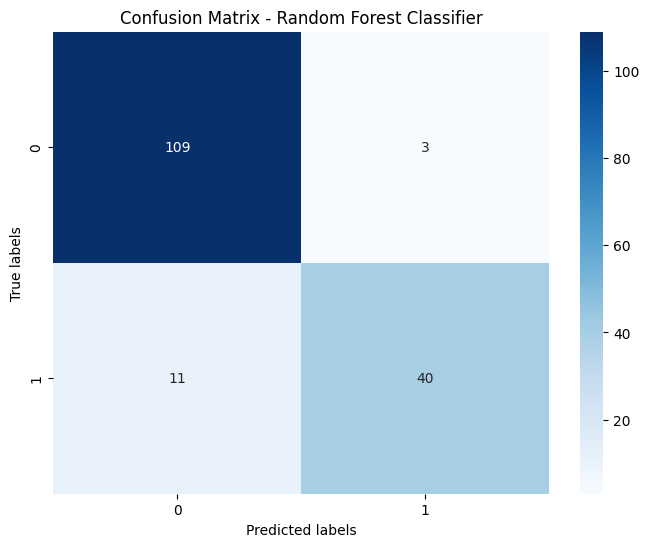

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [28]:
data.head(26)

,Target,Age (yrs),BMI,Blood Group,Pulse rate(bpm),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),I beta-HCG(mIU/mL),FSH/LH,TSH (mIU/L),AMH(ng/mL),Weight gain(Y/N),Hair loss(Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Endometrium (mm),II beta-HCG(mIU/mL)
0,0,28,19.3,15,78,10.48,2,5,0,1.99,2.16,0.68,2.07,0,0,0,3,3,8.5,1.99
1,0,36,24.9,15,74,11.70,2,5,1,60.80,6.17,3.16,1.53,0,0,0,3,5,3.7,1.99
2,1,33,25.3,11,72,11.80,2,5,1,494.08,6.30,2.54,6.63,0,1,0,13,15,10.0,494.08
3,0,37,29.7,13,72,12.00,2,5,0,1.99,3.42,16.41,1.22,0,0,0,2,2,7.5,1.99
4,0,25,20.1,11,72,10.00,2,5,1,801.45,4.42,3.57,2.26,0,1,0,3,4,7.0,801.45
5,0,36,27.2,15,78,11.20,2,5,1,237.97,3.03,1.60,6.74,1,1,0,9,6,8.0,1.99
6,0,34,26.3,11,72,10.90,2,5,0,1.99,9.19,1.51,3.05,0,0,0,6,6,6.8,1.99
7,0,33,23.1,13,72,11.00,2,5,1,100.51,1.58,12.18,1.54,1,0,0,7,6,7.1,100.51
8,0,32,16.0,11,72,11.80,2,5,0,1.99,1.25,1.51,1.00,0,0,0,5,7,4.2,1.99
9,0,36,23.1,15,80,10.00,4,2,0,1.99,1.85,6.65,1.61,0,0,0,1,1,2.5,1.99


**Predicting System**

In [29]:
# Convert input data to a numpy array
#input_data = (34,25.23634033,11,72,20,11.2,2,5,12.0,1,0,5.34,0.89,6.0,38,32,0.842105263,0.65,1.89,11.46,21.5,0.98,100,0,1,0,0,1,1,0,120,70,4,6,18,17,7.3,610.63,610.63)

input_data  = (34,25.2,11,72,11.2,2,5,1,610.63,6.0,0.65,1.89,0,0,0,4,6,7.3,610.63)
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using the classifier
prediction = model.predict(input_data_reshaped)

# Output the prediction
if prediction[0] == 0:
    print('The patient is not infected with PCOS')
else:
    print('The patient is infected with PCOS')

The patient is infected with PCOS


**Saving the trained model**

In [30]:
import joblib

In [31]:
filename = 'POCS.sav'
joblib.dump(model, open(filename, 'wb'))

In [32]:
# loading the saved model
loaded_model = joblib.load(open('POCS.sav', 'rb'))

In [36]:
input_data  = (36,24.9,15,74,11.7,2,5,1,60.8,6.17,3.16,1.53,0,0,0,3,5,3.7,1.99)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

# Output the prediction
if prediction[0] == 0:
    print('The patient is not infected with PCOS')
else:
    print('The patient is infected with PCOS')


[0]
The patient is not infected with PCOS
